#IMDB Binary Classification

In [1]:
import numpy as np
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [39]:
imdb = tf.keras.datasets.imdb
max_features = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [40]:
x_train.shape

(25000,)

In [41]:
x_train[0:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369,

- x_train is column of features of texts that has already been converted to unique integers. Ther reviews, also called squence of words, are now sequences of integers. EAch integer represents a specific word.

In [42]:
word_index = imdb.get_word_index()

In [43]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [44]:
len(word_index)

88584

- we need to reverse them by using list / dict comprehension as below:

In [45]:
[(value, key) for (key, value) in word_index.items()]

[(34701, 'fawn'),
 (52006, 'tsukino'),
 (52007, 'nunnery'),
 (16816, 'sonja'),
 (63951, 'vani'),
 (1408, 'woods'),
 (16115, 'spiders'),
 (2345, 'hanging'),
 (2289, 'woody'),
 (52008, 'trawling'),
 (52009, "hold's"),
 (11307, 'comically'),
 (40830, 'localized'),
 (30568, 'disobeying'),
 (52010, "'royale"),
 (40831, "harpo's"),
 (52011, 'canet'),
 (19313, 'aileen'),
 (52012, 'acurately'),
 (52013, "diplomat's"),
 (25242, 'rickman'),
 (6746, 'arranged'),
 (52014, 'rumbustious'),
 (52015, 'familiarness'),
 (52016, "spider'"),
 (68804, 'hahahah'),
 (52017, "wood'"),
 (40833, 'transvestism'),
 (34702, "hangin'"),
 (2338, 'bringing'),
 (40834, 'seamier'),
 (34703, 'wooded'),
 (52018, 'bravora'),
 (16817, 'grueling'),
 (1636, 'wooden'),
 (16818, 'wednesday'),
 (52019, "'prix"),
 (34704, 'altagracia'),
 (52020, 'circuitry'),
 (11585, 'crotch'),
 (57766, 'busybody'),
 (52021, "tart'n'tangy"),
 (14129, 'burgade'),
 (52023, 'thrace'),
 (11038, "tom's"),
 (52025, 'snuggles'),
 (29114, 'francesco'),

## Data preparation

- convert the x_train array from a feature of text (integers) to a matrix of 0 and 1.
0 - no such word exist
1- when the word exist in the clice of data

In [46]:
def matrix_seq(data, dim=max_features):
  results = np.zeros((len(data), dim)) # create a matrix of zeros for writing
  for i, loc in enumerate(data):
    results[i, loc] = 1.0
    
  return results

In [47]:
x_train = matrix_seq(x_train)
x_test = matrix_seq(x_test)

In [48]:
y_train = np.asarray(y_train.astype('float32'))
y_test = np.asarray(y_test.astype('float32'))

In [49]:
y_train.shape

(25000,)

# Network Architecture

In [52]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu', input_shape=[5000,]),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                80016     
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 80,305
Trainable params: 80,305
Non-trainable params: 0
_________________________________________________________________


- let's use some of the training data for validation

In [53]:
x_val = x_train[:10000]
x_train_1 = x_train[10000:]

In [54]:
y_val = y_train[:10000]
y_train_1 = y_train[10000:]

In [55]:
h = model.fit(x_train_1,
              y_train_1,
              epochs=50,
              batch_size=512,
              validation_data=(x_val, y_val))

Epoch 1/50
30/30 [==============================] - 1s 18ms/step - loss: 0.6904 - accuracy: 0.5335 - val_loss: 0.6874 - val_accuracy: 0.5410
Epoch 2/50
30/30 [==============================] - 0s 14ms/step - loss: 0.6832 - accuracy: 0.5757 - val_loss: 0.6806 - val_accuracy: 0.5801
Epoch 3/50
30/30 [==============================] - 0s 13ms/step - loss: 0.6743 - accuracy: 0.6133 - val_loss: 0.6702 - val_accuracy: 0.6249
Epoch 4/50
30/30 [==============================] - 0s 13ms/step - loss: 0.6612 - accuracy: 0.6502 - val_loss: 0.6556 - val_accuracy: 0.6585
Epoch 5/50
30/30 [==============================] - 0s 13ms/step - loss: 0.6438 - accuracy: 0.6875 - val_loss: 0.6364 - val_accuracy: 0.6903
Epoch 6/50
30/30 [==============================] - 0s 13ms/step - loss: 0.6221 - accuracy: 0.7169 - val_loss: 0.6140 - val_accuracy: 0.7190
Epoch 7/50
30/30 [==============================] - 0s 13ms/step - loss: 0.5979 - accuracy: 0.7422 - val_loss: 0.5903 - val_accuracy: 0.7414
Epoch 8/50
30

# Visualisation of Performance

In [56]:
import matplotlib.pyplot as plt 
loss_values = h.history['loss']
val_loss_values = h.history['val_loss']

epochs = range(1, len(h.history['accuracy']) + 1)

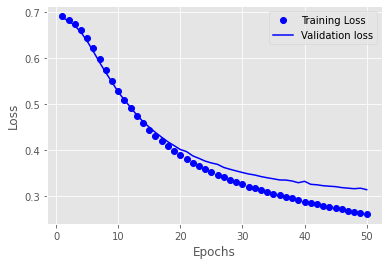

In [57]:
plt.style.use('ggplot')
plt.plot(epochs, loss_values,' bo',
         label='Training Loss')
plt.plot(epochs, val_loss_values, 'b',
         label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

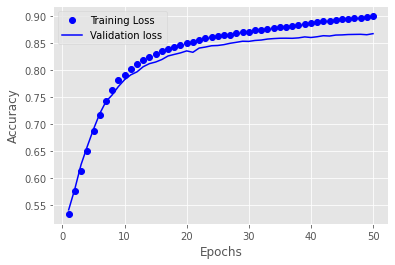

In [58]:
plt.clf()
acc_values = h.history['accuracy']
val_acc_values = h.history['val_accuracy']

plt.plot(epochs, acc_values,' bo',
         label='Training Loss')
plt.plot(epochs, val_acc_values, 'b',
         label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

- seems to be overfitting